# Introduction to Data Science 2024

# Week 2

## Exercise 1 | Titanic: data preprocessing and imputation
<span style="background-color: #c177f2"> *Note: You can find tutorials for NumPy and Pandas under 'Useful tutorials' in Moodle.*</span>

Download the [Titanic dataset](https://www.kaggle.com/c/titanic) [train.csv] from Kaggle, and complete the following exercises. You will need to create a Kaggle account unless you already have one, but it is quite straightforward.

The dataset consists of personal information of all the passengers on board the RMS Titanic, along with information about whether they survived the iceberg collision or not.

1. Your first task is to read the data file and print the shape of the data.

    <span style="background-color: #c177f2"> *Hint 1: You can read them into a Pandas dataframe if you wish.*</span>
    
    <span style="background-color: #c177f2"> *Hint 2: The shape of the data should be (891, 12).*</span>

In [ ]:
import pandas as pd

data = pd.read_csv("train.csv")
print(data.shape) # print the shape of the data
data.head(3) # print first three passenger records

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


2. Let's look at the data and get started with some preprocessing. Some of the columns, e.g <span style="background-color: #c177f2"> *Name*</span>, simply identify a person and are not useful for prediction tasks. Try to identify these columns, and remove them.

    <span style="background-color: #c177f2"> *Hint: The shape of the data should now be (891, 9).*</span>

In [ ]:
variables_to_remove = ["PassengerId", "Ticket", "Name"]

# Remove useless columns
for val in variables_to_remove:
    del data[val]

data.shape

(891, 9)

3. The column <span style="background-color: #c177f2">*Cabin*</span> contains a letter and a number. A smart catch at this point would be to notice that the letter stands for the deck level on the ship. Keeping just the deck information would be more informative when developing, e.g. a classifier that predicts whether a passenger survived. The next step in our preprocessing will be to add a new column to the dataset, which consists simply of the deck letter. You can then remove the original <span style="background-color: #c177f2">*Cabin*</span>-column.

<span style="background-color: #c177f2">*Hint: The deck letters should be ['A' 'B' 'C' 'D' 'E' 'F' 'G' 'T'].*</span>

In [ ]:
data["Deck"] = data["Cabin"].str[0]
data = data.drop("Cabin", axis = 1)
data.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck
0,0,3,male,22.0,1,0,7.2500,S,NaN
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,S,NaN
3,1,1,female,35.0,1,0,53.1000,S,C
4,0,3,male,35.0,0,0,8.0500,S,NaN


4. You’ll notice that some of the columns, such as the previously added deck number, are [categorical](https://en.wikipedia.org/wiki/Categorical_variable). To preprocess the categorical variables so that they're ready for further computation, we need to avoid the current string format of the values. This means the next step for each categorical variable is to transform the string values to numeric ones, that correspond to a unique integer ID representative of each distinct category. This process is called label encoding and you can read more about it [here](https://pandas.pydata.org/docs/user_guide/categorical.html).

    <span style="background-color: #c177f2">*Hint: Pandas can do this for you.*</span>

In [ ]:
import numpy as np

categorical_values = ["Sex", "Embarked", "Deck"]

for val in categorical_values:
    data[val] = data[val].astype('category')

cat_columns = data.select_dtypes(['category']).columns
data[cat_columns] = data[cat_columns].apply(lambda x: x.cat.codes)

data.replace(-1, np.NaN, inplace=True) # NaNs were labeled as -1

data.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck
0,0,3,1,22.0,1,0,7.2500,2.0,NaN
1,1,1,0,38.0,1,0,71.2833,0.0,2.0
2,1,3,0,26.0,0,0,7.9250,2.0,NaN
3,1,1,0,35.0,1,0,53.1000,2.0,2.0
4,0,3,1,35.0,0,0,8.0500,2.0,NaN


5. Next, let's look into missing value **imputation**. Some of the rows in the data have missing values, e.g when the cabin number of a person is unknown. Most machine learning algorithms have trouble with missing values, and they need to be handled during preprocessing:

    a) For continuous variables, replace the missing values with the mean of the non-missing values of that column.

    b) For categorical variables, replace the missing values with the mode of the column.

    <span style="background-color: #c177f2">*Remember: Even though in the previous step we transformed categorical variables into their numeric representation, they are still categorical. You can use the lists we created in step 4, to see which variables are categorical.*</span>

In [ ]:
# Continuous variables
for val in ["Age", "Fare", "Pclass", "SibSp"]:
    data[val].fillna(data[val].mean(), inplace=True)

# Categorical variables
for val in categorical_values:
    data[val].fillna(data[val].mode()[0], inplace=True)

data.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck
0,0,3,1,22.0,1,0,7.2500,2.0,2.0
1,1,1,0,38.0,1,0,71.2833,0.0,2.0
2,1,3,0,26.0,0,0,7.9250,2.0,2.0
3,1,1,0,35.0,1,0,53.1000,2.0,2.0
4,0,3,1,35.0,0,0,8.0500,2.0,2.0


6. At this point, all data is numeric. Write the data, with the modifications we made, to a  <span style="background-color: #c177f2"> .csv</span> file. Then, write another file, this time in <span style="background-color: #c177f2">JSON</span> format, with the following structure:

In [ ]:
#[
#    {
#        "Deck": 0,
#        "Age": 20,
#        "Survived", 0
#        ...
#    },
#    {
#        ...
#    }
#]

In [ ]:
# write CSV
data.to_csv("train_preprocessed.csv")

# write JSON
with open("train_preprocessed.json", 'w') as f:
    f.write(data.to_json(orient="records"));

Study the records and try to see if there is any evident pattern in terms of chances of survival.

**Remember to submit your code on Moodle. You can return this Jupyter notebook (.ipynb) or .py, .R, etc depending on your programming preferences.**

## Exercise 2 | Titanic 2.0: exploratory data analysis

In this exercise, we’ll continue to study the Titanic dataset from the last exercise. Now that we have done some preprocessing, it’s time to look at the data with some exploratory data analysis.

1. First investigate each feature variable in turn. For each categorical variable, find out the mode, i.e., the most frequent value. For numerical variables, calculate the median value.

In [ ]:
m_surv = data['Survived'].mode()[0]
m_pcla = data['Pclass'].mode()[0]
m_sex = data['Sex'].mode()[0]
m_age = data['Age'].median()
m_sib = data['SibSp'].median()
m_parc = data['Parch'].median()
m_fare = data['Fare'].median()
m_emba = data['Embarked'].mode()[0]
m_deck = data['Deck'].mode()[0]

2. Next, combine the modes of the categorical variables, and the medians of the numerical variables, to construct an imaginary “average survivor”. This "average survivor" should represent the typical passenger of the class of passengers who survived. Also following the same principle, construct the “average non-survivor”.

    <span style="background-color: #c177f2">*Hint 1: What are the most frequent variable values for a non-survivor?*</span>
    
    <span style="background-color: #c177f2">*Hint 2: You can split the dataframe in two: one subset containing all the survivors and one consisting of all the non-survivor instances. Then, you can use the summary statistics of each of these dataframe to create a prototype "average survivor" and "average non-survivor", respectively.*</span>

In [ ]:
surv = data[data['Survived'] == 1]
nonsurv = data[data['Survived'] == 0]


#prototype average survivor:
avg_surv = [892, 1, surv['Pclass'].mode()[0],
                    surv['Sex'].mode()[0],
                    surv['Age'].median(),
                    surv['SibSp'].median(),
                    surv['Parch'].median(),
                    surv['Fare'].median(),
                    surv['Embarked'].mode()[0],
                    surv['Deck'].mode()[0]]

#prototype average non-survivor:
avg_nonsurv = [893, 0, nonsurv['Pclass'].mode()[0],
                    nonsurv['Sex'].mode()[0],
                    nonsurv['Age'].median(),
                    nonsurv['SibSp'].median(),
                    nonsurv['Parch'].median(),
                    nonsurv['Fare'].median(),
                    nonsurv['Embarked'].mode()[0],
                    nonsurv['Deck'].mode()[0]]

3. Next, let's study the distributions of the variables in the two groups (survivor/non-survivor). How well do the average cases represent the respective groups? Can you find actual passengers that are very similar to the (average) representative of their own group? Can you find passengers that are very similar to the (average) representative of the other group?

    <span style="background-color: #c177f2">*Note: Feel free to choose EDA methods according to your preference: non-graphical/graphical, static/interactive - anything goes.*</span>

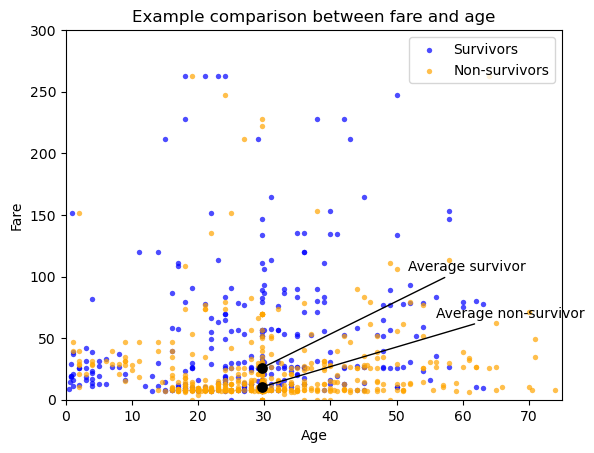

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel('Age')
ax.set_ylabel('Fare')

plt.axvspan(76, 76, facecolor='g', alpha=1)
plt.annotate('Average survivor', xy=(avg_surv[4], avg_surv[7]), xytext=(105,70),
xycoords='data',textcoords='offset points',arrowprops=dict(arrowstyle="-"))

plt.annotate('Average non-survivor', xy=(avg_nonsurv[4], avg_nonsurv[7]), xytext=(125, 50),
xycoords='data',textcoords='offset points',arrowprops=dict(arrowstyle="-"))

plt.scatter(surv['Age'], surv['Fare'], s=15, marker='o', c='blue', lw=0, alpha=0.7, label='Survivors')
plt.scatter(nonsurv['Age'], nonsurv['Fare'], s=15, marker='o', c='orange', lw=0, alpha=0.7, label = 'Non-survivors')
plt.scatter(avg_surv[4], avg_surv[7], s=60, marker='o', c='k', lw=0)
plt.scatter(avg_nonsurv[4], avg_nonsurv[7], s=60, marker='o', c='k', lw=0)
plt.title("Example comparison between fare and age")
plt.legend(loc="upper right")
plt.xlim((0,75))
plt.ylim((0,300))
plt.show()

4. Next, let's continue the analysis by looking into pairwise and multivariate relationships between the variables in the two groups. Try to visualize two variables at a time using, e.g., scatter plots and use a different color to encode the survival status.

    <span style="background-color: #c177f2">*Hint 1: You can also check out Seaborn's pairplot function, if you wish.*</span>

    <span style="background-color: #c177f2">*Hint 2: To better show many data points with the same value for a given variable, you can use either transparency or ‘jitter’.*</span>

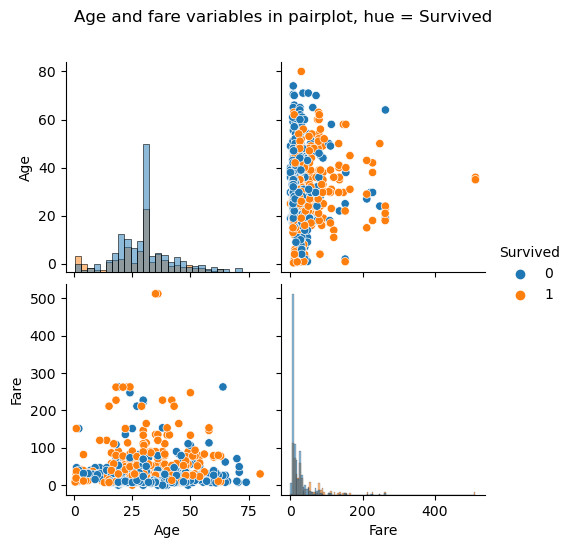

In [ ]:
import seaborn as sns

# The following plots are only examples of what you can visualize in your exploration

# Let's start with the continuous variables

g = sns.pairplot(data[['Age','Fare', 'Survived']],
                 hue = 'Survived', diag_kind = 'hist')
g.fig.suptitle("Age and fare variables in pairplot, hue = Survived", y=1.08)
plt.show()

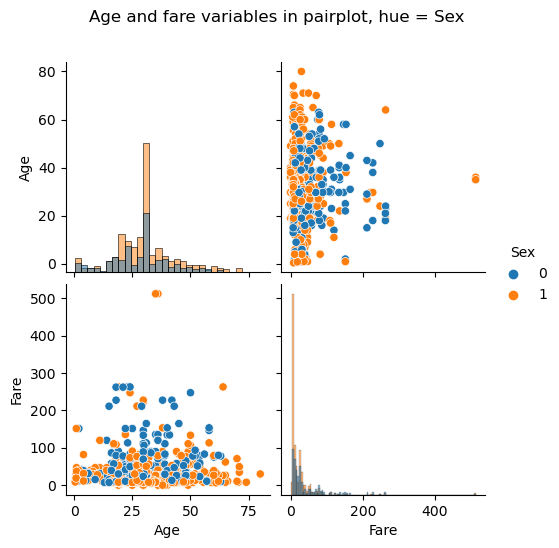

In [ ]:
g = sns.pairplot(data[['Age','Fare', 'Sex']],
                 hue = 'Sex', diag_kind = 'hist')

g.fig.suptitle("Age and fare variables in pairplot, hue = Sex", y=1.08)
plt.show()

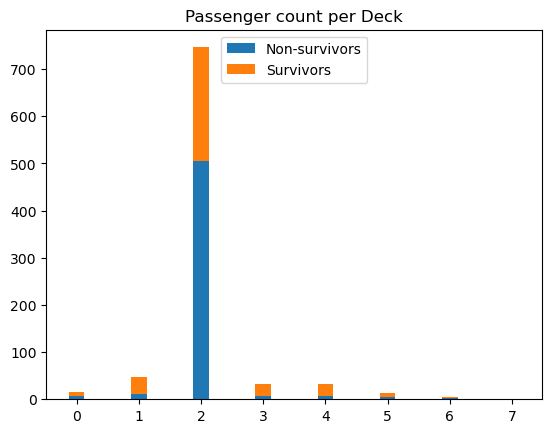

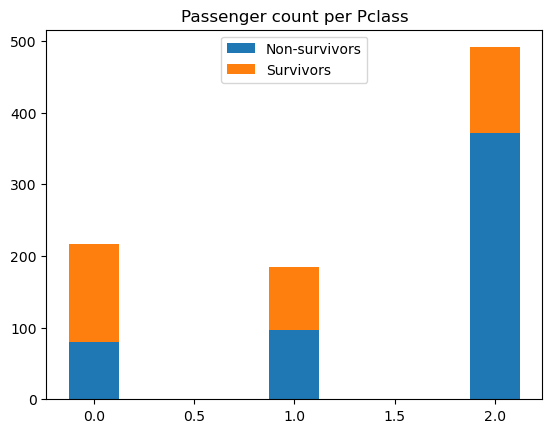

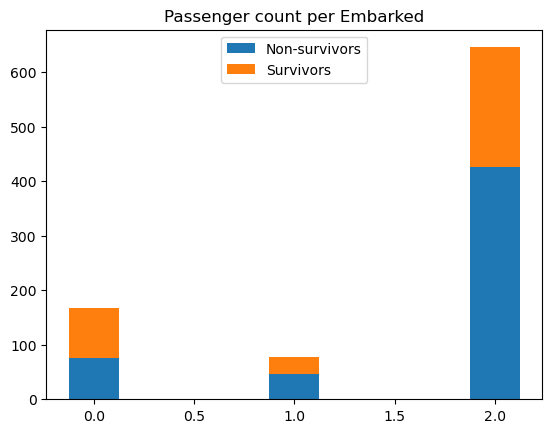

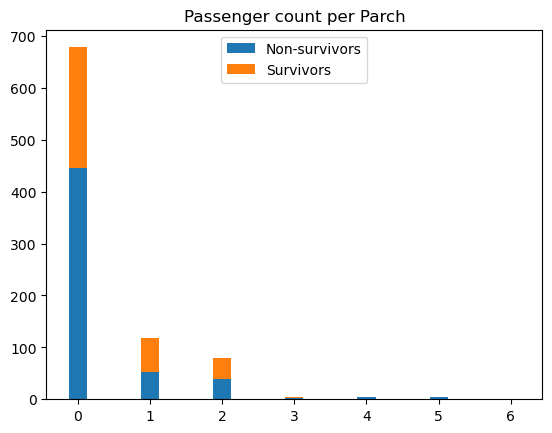

In [ ]:
# And let's continue with the categorical variables

def visualize_cat(x):
    fig = plt.figure()
    ax.set_xlabel(x)

    ax.set_ylabel('Passenger Count')

    tb = pd.pivot_table(data=data, values='Age', index=x, columns='Survived', aggfunc='count')
    bar1=tb[0]
    bar2=tb[1]

    i = np.arange(len(bar1))
    firstb = plt.bar(i, bar1, 0.25, label = 'Non-survivors')
    secondb = plt.bar(i, bar2, 0.25, bottom=bar1, label = 'Survivors')

    plt.title('Passenger count per ' + x)
    plt.legend(loc = 'upper center')
    plt.show()

visualize_cat('Deck')
visualize_cat('Pclass')
visualize_cat('Embarked')
visualize_cat('Parch')

5. Finally, recall the preprocessing we did in the first exercise. What can you say about the effect of the choices that were made to use the mode and mean to impute missing values, instead of, for example, ignoring passengers with missing data?

*Take a look at the Age | Fare plot again. Do you notice anything strange? The process we followed in Exercise 1 to clean the data, by imputing all missing values with the mean/mode of each column, has a very obvious effect on the data. In the stacked bar graphs above, you can see the average value gathering an extreme amount of passengers, compared to the rest of the values. And in the scatter plot, the density of non-survivors at the age of 30 represents the same.*

*What if we take away all the rows that contain N/A values? That would probably make our visualizations less extreme. But, then again, how impartial would our data be? Especially in a small-ish dataset like this, is it worth losing useful information (from the rest of the columns), just to get rid of (maybe even) a single missing value on that row?*

**Remember to submit your code on Moodle. You can return this Jupyter notebook (.ipynb) or .py, .R, etc depending on your programming preferences.**

## Exercise 3 | Working with text data 2.0

This exercise is related to the second exercise from last week. Find the saved <span style="background-color: #c177f2">pos.txt</span> and <span style="background-color: #c177f2">neg.txt</span> files, or, alternatively, you can find the week 1 example solutions on Moodle after Tuesday.

1. Find the most common words in each file (positive and negative). Examine the results. Do they tend to be general terms relating to the nature of the data? How well do they indicate positive/negative sentiment?

In [ ]:
import pandas as pd
import numpy as np
from collections import Counter

pos_df = pd.read_table("pos.txt", header=None)
pos_df.columns = ["pos"]
neg_df = pd.read_table("neg.txt", header=None)
neg_df.columns = ["neg"]

pos_doc = (" ".join(pos_df["pos"].dropna()))
neg_doc = (" ".join(neg_df["neg"].dropna()))

pos_words = (" ".join(pos_df["pos"].dropna()).split())
neg_words = (" ".join(neg_df["neg"].dropna()).split())
pos_most_common = Counter(pos_words).most_common(10)
neg_most_common = Counter(neg_words).most_common(10)

print("Most common words in positive reviews:")
print(pos_most_common, "\n")

print("Most common words in negative reviews:")
print(neg_most_common)

Most common words in positive reviews:
[('great', 435906), ('work', 427780), ('good', 291448), ('fit', 273505), ('instal', 229408), ('product', 210084), ('easi', 162864), ('light', 147321), ('car', 147195), ('price', 144891)] 

Most common words in negative reviews:
[('work', 39998), ('fit', 31293), ('product', 24394), ('light', 22907), ('time', 19665), ('instal', 18709), ('good', 17295), ('dont', 17136), ('buy', 16885), ('car', 16694)]


2. Compute a [TF/IDF](https://en.wikipedia.org/wiki/Tf–idf) vector for each of the two text files, and make them into a <span style="background-color: #c177f2">2 x m</span> matrix, where <span style="background-color: #c177f2">m</span> is the number of unique words in the data. The problem with using the most common words in a document to analyze its contents is that words that are common overall will be common in both documents (positive and negative). This means that they probably are not good indicators about the sentiment of a specific review. TF/IDF stands for Term Frequency / Inverse Document Frequency (in this case we have the positive/negative documents), and is designed to help by taking into consideration not just the number of times a term occurs (term frequency), but also how many times a word exists in the other document as well (inverse document frequency). You can use any variant of the formula, as well as off-the-shelf implementations. <span style="background-color: #c177f2">*Hint: You can use [sklearn](http://scikit-learn.org/).*</span>

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

corpus = [pos_doc, neg_doc]

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
vectorizer.get_feature_names_out()
print(X.shape)

(2, 235548)


3. List the words with the highest TF/IDF score in each class (positive | negative), and compare them to the most common words. What do you notice? Did TF/IDF work as expected?

In [ ]:
K = 10 # choose K highest


print("Positive words with highest TF/IDF:")

# get indices of words with highest TF/IDF score
#(np.flip for descending order of indices)
idx_pos = np.flip(np.argsort(X[0, :].A)[0][-K:])
pos_scores = np.flip(np.sort(X[0, :].A)[0][-K:])
pos_words = vectorizer.get_feature_names_out()[idx_pos]

print(dict(zip(pos_words, pos_scores)))

print("\nNegative words with highest TF/IDF:")

idx_neg = np.flip(np.argsort(X[1, :].A)[0][-K:])
neg_scores = np.flip(np.sort(X[1, :].A)[0][-K:])
neg_words = vectorizer.get_feature_names_out()[idx_neg]

print(dict(zip(neg_words, neg_scores)))

Positive words with highest TF/IDF:
{'great': 0.4112292995882237, 'work': 0.40356331359937764, 'good': 0.2749490874325855, 'fit': 0.2580218432044457, 'instal': 0.2164211806213615, 'product': 0.19819111499885841, 'easi': 0.15364424588818795, 'light': 0.13898113732005685, 'car': 0.1388622701979064, 'price': 0.13668869996429808}

Negative words with highest TF/IDF:
{'work': 0.3448882908808285, 'fit': 0.2698282235745229, 'product': 0.21034064122573454, 'light': 0.1975187779190744, 'time': 0.16956418421349798, 'instal': 0.16132094189933047, 'good': 0.14912853119615804, 'dont': 0.14775753168993142, 'buy': 0.14559324945054225, 'car': 0.14394632551538955}


<span style="background-color: #c177f2"> I think I've seen this before... </span>

Notice how the results for each document are the same as the most frequent words we calculated in exercise 3.1. Also notice how many of the words with the highest TF/IDF score are common between the two documents.

Common words that appear as frequently in both documents are not very good indicators of sentiment. For example, the word "good" is common in both documents, and it can appear both as "a good product" (in the positive document) and "*not* a good product" (in the negative document). Still, common words like "good" can have a high TF score and be present in all documents of the corpus. This means that the IDF term is constant for all words that are present across all documents, and therefore the TF/IDF scores of the 10 most common words are directly proportional to their term frequencies (TF) that we calculated in exercise 3.1. A better way to detect words that are good sentiment indicators would be to identify the words that are frequent in one document (positive or negative), but rare or non-existent in the other.

4. Plot the words in each class with their corresponding TF/IDF scores. Note that there will be a lot of words, so you’ll have to think carefully to make your chart clear! If you can’t plot them all, plot a subset – think about how you should choose this subset.

    <span style="background-color: #c177f2">*Hint: you can use word clouds. But feel free to challenge yourselves to think of any other meaningful way to visualize this information!*</span>

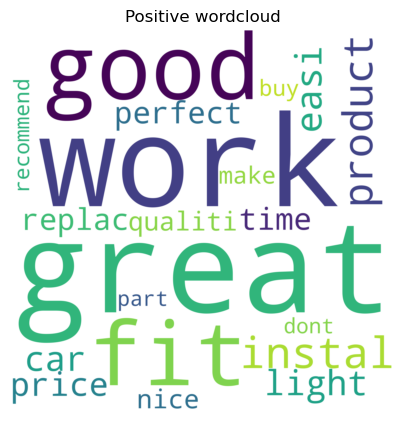

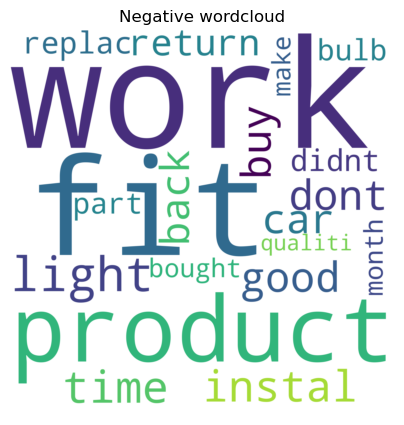

In [ ]:
from PIL import Image
from wordcloud import WordCloud
from os import path
import PIL.ImageOps
import matplotlib.pyplot as plt

K = 20 # choose some more words for the wordclouds
idx_pos = np.flip(np.argsort(X[0, :].A)[0][-K:])
pos_scores = np.flip(np.sort(X[0, :].A)[0][-K:])
pos_words = vectorizer.get_feature_names_out()[idx_pos]

idx_neg = np.flip(np.argsort(X[1, :].A)[0][-K:])
neg_scores = np.flip(np.sort(X[1, :].A)[0][-K:])
neg_words = vectorizer.get_feature_names_out()[idx_neg]

wordcloud = WordCloud(background_color="white", width=1000, height=1000, scale=4)
wordcloud.generate_from_frequencies(dict(zip(pos_words, pos_scores)))

plt.figure(figsize=(5, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("Positive wordcloud")
plt.axis("off")

plt.show()

wordcloud = WordCloud(background_color="white", width=1000, height=1000, scale=4)
wordcloud.generate_from_frequencies(dict(zip(neg_words, neg_scores)))

plt.figure(figsize=(5, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("Negative wordcloud")
plt.axis("off")

plt.show()

**Remember to submit your code on Moodle. You can return this Jupyter notebook (.ipynb) or .py, .R, etc depending on your programming preferences.**

## Exercise 4 | Junk charts

There’s a thriving community of chart enthusiasts who keep looking for statistical graphics that they find inappropriate, and which they call “junk charts”, and who often also propose ways to improve them.

1. Find at least three statistical visualizations you think are not very good and identify their problems. Copying examples from various junk chart websites is not accepted – you should find your own junk charts, out in the wild. You should be able to find good (or rather, bad) examples quite easily since a significant fraction of charts can have at least *some* issues. The examples you choose should also have different problems, e.g., try to avoid collecting three bar charts, all with problematic axes. Instead, try to find as interesting and diverse examples as you can.

2. Try to produce improved versions of the charts you selected. The data is of course often not available, but perhaps you can try to extract it, at least approximately, from the chart. Or perhaps you can simulate data that looks similar enough to make the point.

**Submit a PDF with all the charts (the ones you found and the ones you produced).**